# Netflix Content Analysis - Assignment Solutions

## Comprehensive Analysis with Visualizations

This notebook provides detailed solutions to all submission questions with professional visualizations and insights.

**Dataset**: Netflix Titles (7,770 records after cleaning)  
**Analysis Period**: 2008-2021  
**Content Types**: Movies (69.1%) and TV Shows (30.9%)

## Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
# Dataset is already available in the project structure
# Clone dataset repository (commented out as dataset is already available)
# !git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

In [3]:
# Load and clean the Netflix dataset
print("Loading Netflix Dataset...")
netflix_df = pd.read_csv('../21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')

print(f"Original dataset shape: {netflix_df.shape}")
print("\nCleaning data...")

# Data cleaning steps
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

# Convert date and create time features
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

# Create content age feature
netflix_df['content_age'] = netflix_df['year_added'] - netflix_df['release_year']

print(f"Cleaned dataset shape: {netflix_df.shape}")
print(f"Analysis ready with {len(netflix_df)} titles")

Loading Netflix Dataset...
Original dataset shape: (7787, 12)

Cleaning data...
Cleaned dataset shape: (7770, 15)
Analysis ready with 7770 titles


---
# Assignment Questions & Solutions

Detailed analysis and visualizations for each submission question.

## Question 1: How has the distribution of content ratings changed over time?

**Analysis Focus**: Netflix's content strategy regarding audience maturity levels and evolution from 2017 to 2021.

QUESTION 1: Content Ratings Distribution Over Time


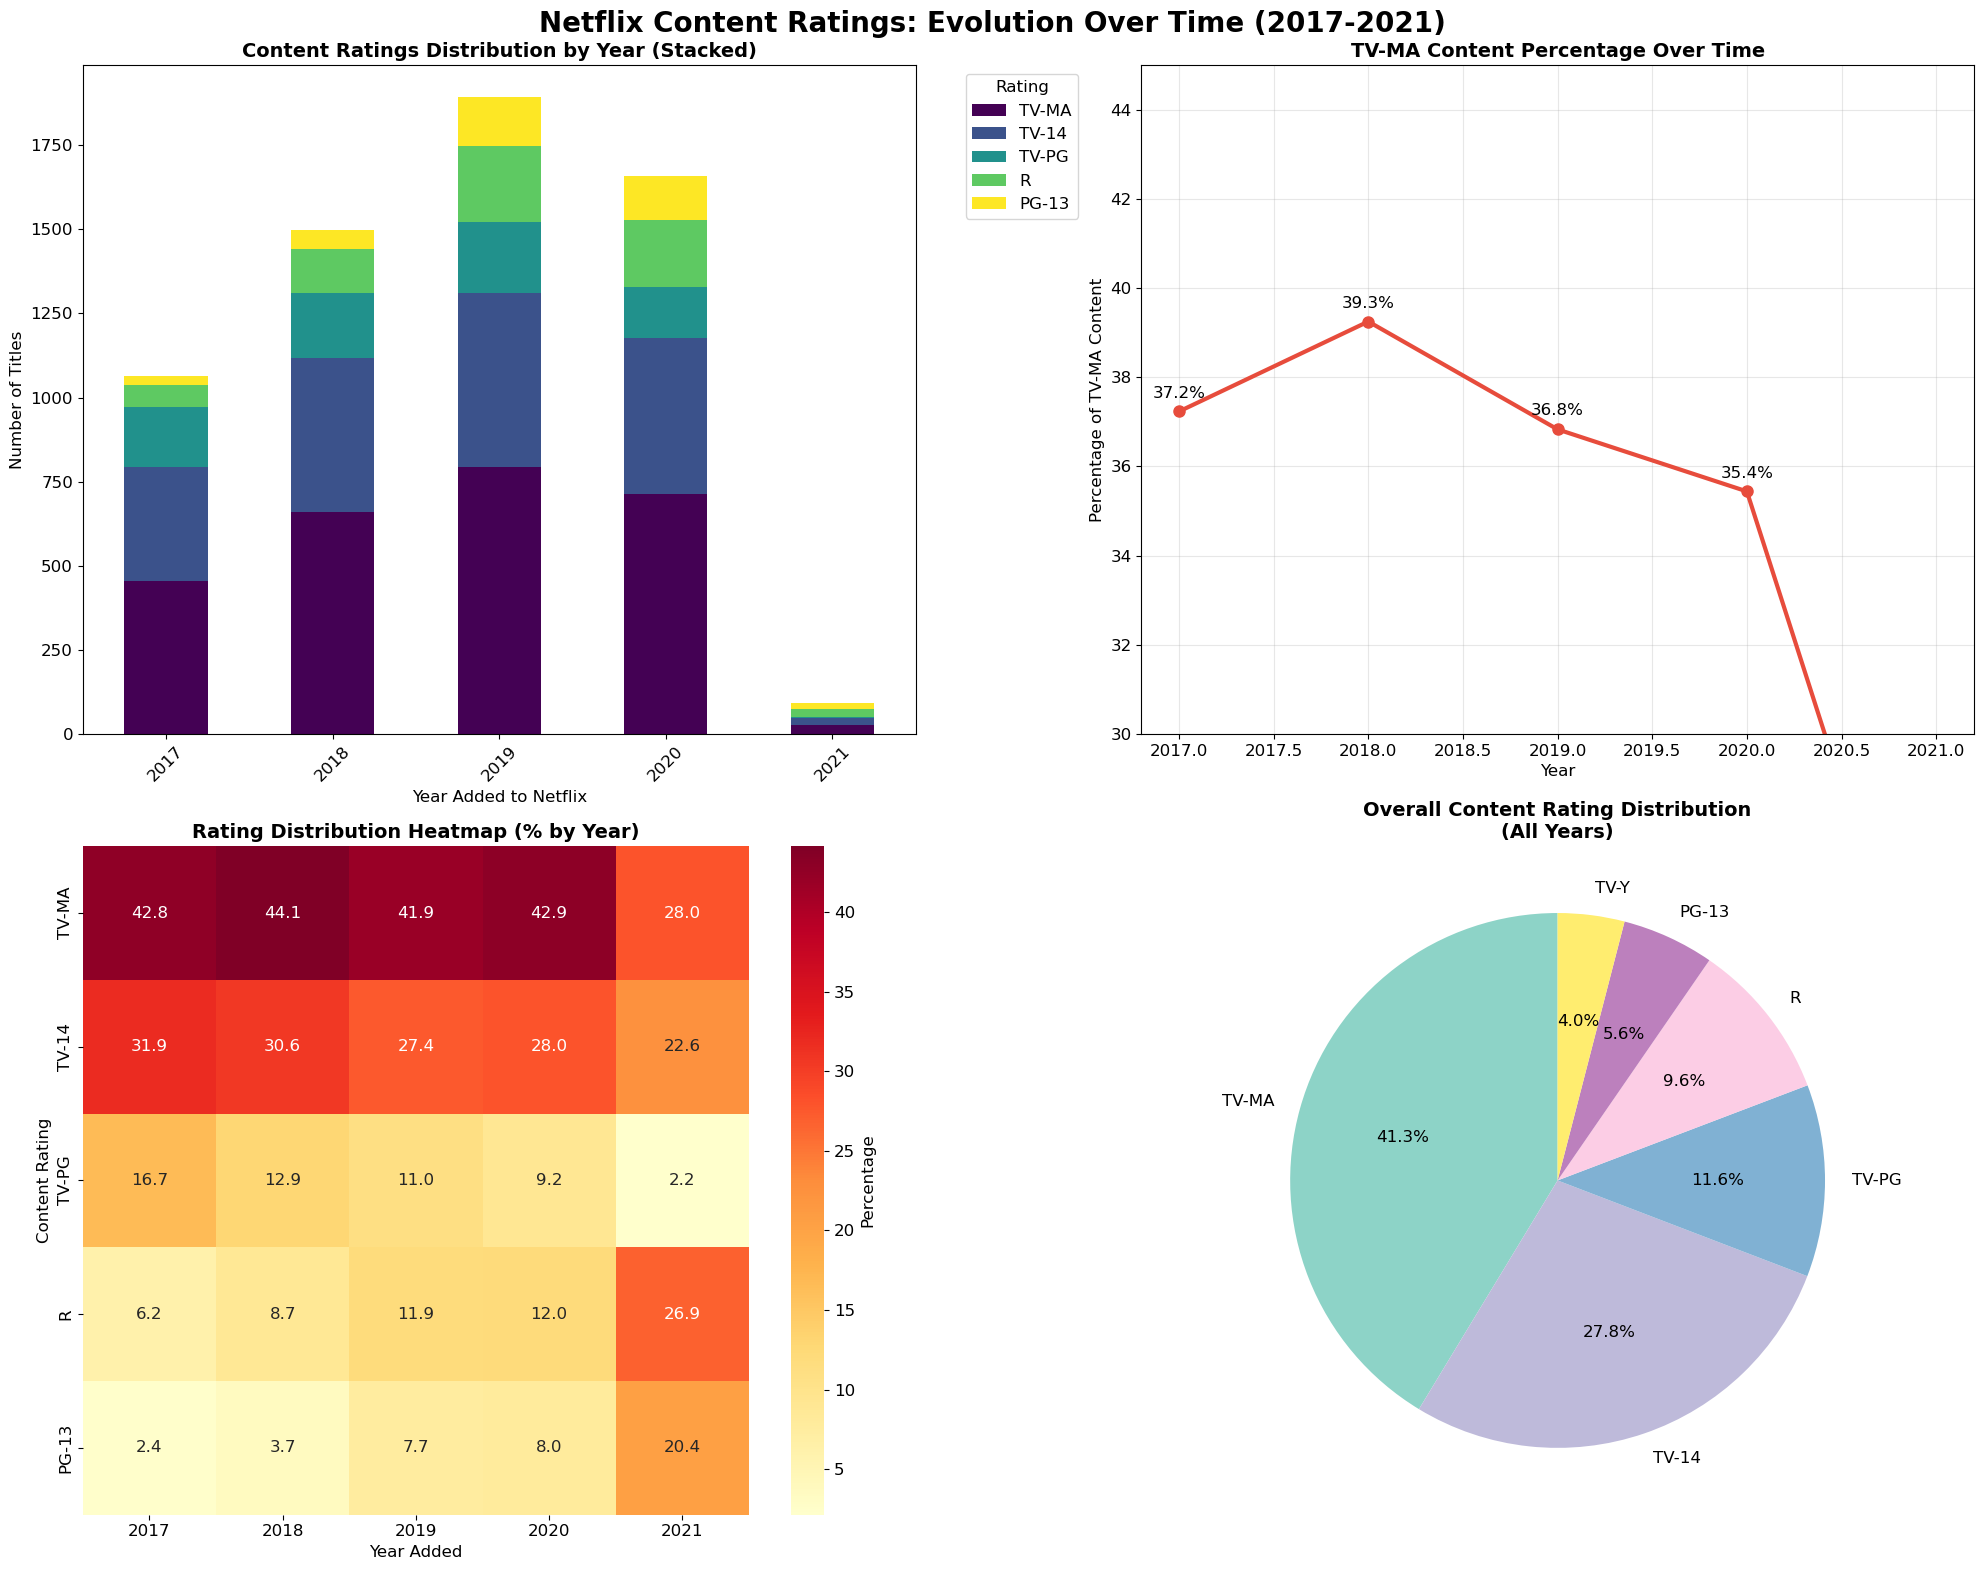


KEY INSIGHTS:
TV-MA consistently dominates: 34.2% average across 2017-2021
Highest TV-MA year: 2018 (39.3%)
Netflix clearly targets mature audiences with 2861 TV-MA titles
TV-14 is second most common with 1928 titles

YEAR-BY-YEAR BREAKDOWN:
  2017: TV-MA (455), TV-14 (339), TV-PG (177)
  2018: TV-MA (661), TV-14 (458), TV-PG (193)
  2019: TV-MA (793), TV-14 (519), R (226)
  2020: TV-MA (712), TV-14 (464), R (199)
  2021: TV-MA (26), R (25), TV-14 (21)


In [4]:
# Question 1 Analysis: Content Ratings Over Time
print("QUESTION 1: Content Ratings Distribution Over Time")
print("=" * 60)

# Create ratings by year analysis
ratings_by_year = netflix_df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)
recent_years = sorted(netflix_df['year_added'].unique())[-5:]  # Last 5 years

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Netflix Content Ratings: Evolution Over Time (2017-2021)', fontsize=20, fontweight='bold')

# 1. Stacked bar chart of ratings by year
ratings_subset = ratings_by_year.loc[recent_years]
top_ratings = ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13']
ratings_subset[top_ratings].plot(kind='bar', stacked=True, ax=ax1, colormap='viridis')
ax1.set_title('Content Ratings Distribution by Year (Stacked)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year Added to Netflix')
ax1.set_ylabel('Number of Titles')
ax1.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# 2. Line plot showing TV-MA dominance over time
tv_ma_trend = ratings_by_year['TV-MA'].loc[recent_years]
total_by_year = ratings_by_year.loc[recent_years].sum(axis=1)
tv_ma_percentage = (tv_ma_trend / total_by_year * 100)

ax2.plot(recent_years, tv_ma_percentage, marker='o', linewidth=3, markersize=8, color='#e74c3c')
ax2.set_title('TV-MA Content Percentage Over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage of TV-MA Content')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(30, 45)

# Add percentage labels
for year, pct in zip(recent_years, tv_ma_percentage):
    ax2.annotate(f'{pct:.1f}%', (year, pct), textcoords="offset points", xytext=(0,10), ha='center')

# 3. Heatmap of ratings distribution
ratings_pct = ratings_subset[top_ratings].div(ratings_subset[top_ratings].sum(axis=1), axis=0) * 100
sns.heatmap(ratings_pct.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax3, cbar_kws={'label': 'Percentage'})
ax3.set_title('Rating Distribution Heatmap (% by Year)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year Added')
ax3.set_ylabel('Content Rating')

# 4. Pie chart for overall rating distribution
overall_ratings = netflix_df['rating'].value_counts().head(6)
colors = plt.cm.Set3(np.linspace(0, 1, len(overall_ratings)))
wedges, texts, autotexts = ax4.pie(overall_ratings.values, labels=overall_ratings.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax4.set_title('Overall Content Rating Distribution\n(All Years)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed insights
print("\nKEY INSIGHTS:")
print(f"TV-MA consistently dominates: {tv_ma_percentage.mean():.1f}% average across 2017-2021")
print(f"Highest TV-MA year: {tv_ma_percentage.idxmax()} ({tv_ma_percentage.max():.1f}%)")
print(f"Netflix clearly targets mature audiences with {overall_ratings['TV-MA']} TV-MA titles")
print(f"TV-14 is second most common with {overall_ratings['TV-14']} titles")

# Show year-by-year breakdown
print("\nYEAR-BY-YEAR BREAKDOWN:")
for year in recent_years:
    year_data = netflix_df[netflix_df['year_added'] == year]['rating'].value_counts().head(3)
    top_3 = ', '.join([f'{rating} ({count})' for rating, count in year_data.items()])
    print(f"  {year}: {top_3}")

## Question 2: Is there a relationship between content age and its type?

**Analysis Focus**: How long does Netflix wait before adding movies vs TV shows to their platform? This reveals their acquisition strategy.

QUESTION 2: Content Age vs Type Relationship
Content Age Statistics by Type:
         mean  median   std  min  max
type                                 
Movie    5.56     1.0  9.73   -1   75
TV Show  2.31     0.0  5.28   -3   93


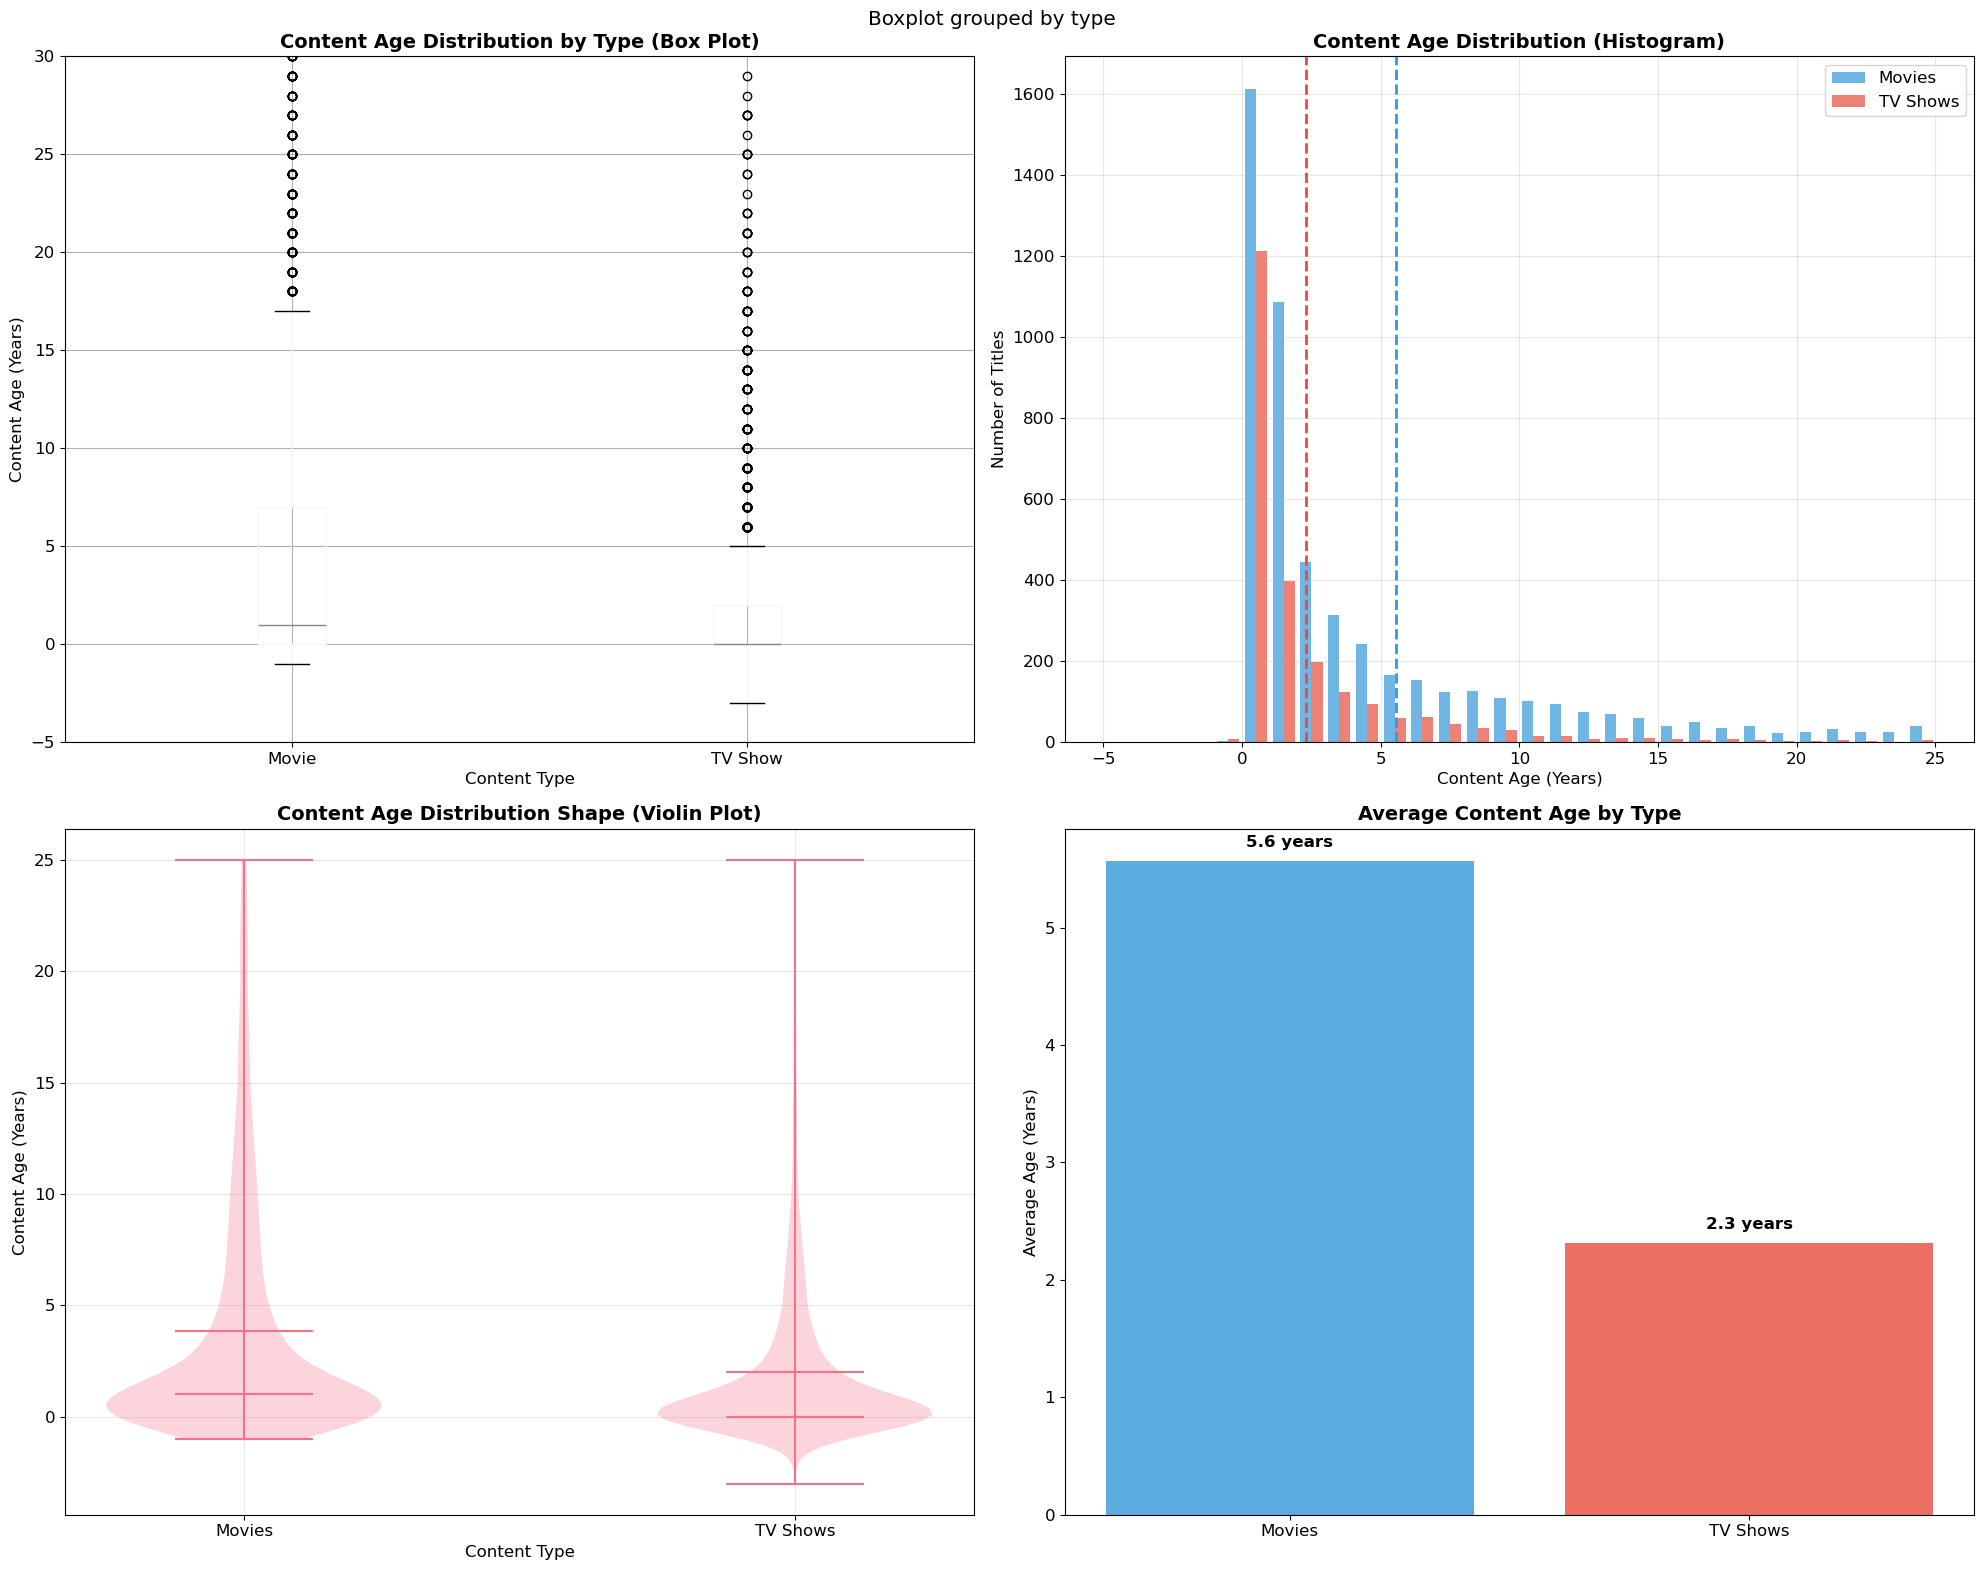


KEY INSIGHTS:
Movies are acquired 5.6 years after release on average
TV Shows are acquired 2.3 years after release on average
Netflix gets TV content 3.3 years fresher than movies
This suggests Netflix prioritizes fresh TV content over movie acquisitions

SAME-YEAR RELEASES:
Movies: 1612/5372 (30.0%) same-year releases
TV Shows: 1211/2398 (50.5%) same-year releases


In [5]:
# Question 2 Analysis: Content Age vs Type
print("QUESTION 2: Content Age vs Type Relationship")
print("=" * 60)

# Calculate statistics by content type
age_stats = netflix_df.groupby('type')['content_age'].agg(['mean', 'median', 'std', 'min', 'max'])
print("Content Age Statistics by Type:")
print(age_stats.round(2))

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Content Age Analysis: Movies vs TV Shows', fontsize=20, fontweight='bold')

# 1. Box plot comparison
netflix_df.boxplot(column='content_age', by='type', ax=ax1)
ax1.set_title('Content Age Distribution by Type (Box Plot)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Content Type')
ax1.set_ylabel('Content Age (Years)')
ax1.set_ylim(-5, 30)  # Focus on reasonable range

# 2. Histogram comparison
movies_age = netflix_df[netflix_df['type'] == 'Movie']['content_age']
tv_age = netflix_df[netflix_df['type'] == 'TV Show']['content_age']

ax2.hist([movies_age, tv_age], bins=30, alpha=0.7, label=['Movies', 'TV Shows'], 
         color=['#3498db', '#e74c3c'], range=(-5, 25))
ax2.set_title('Content Age Distribution (Histogram)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Content Age (Years)')
ax2.set_ylabel('Number of Titles')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add mean lines
ax2.axvline(movies_age.mean(), color='#3498db', linestyle='--', linewidth=2, 
           label=f'Movies Mean: {movies_age.mean():.1f} years')
ax2.axvline(tv_age.mean(), color='#e74c3c', linestyle='--', linewidth=2, 
           label=f'TV Shows Mean: {tv_age.mean():.1f} years')

# 3. Violin plot for distribution shape
data_for_violin = [movies_age[movies_age.between(-5, 25)], tv_age[tv_age.between(-5, 25)]]
parts = ax3.violinplot(data_for_violin, positions=[1, 2], showmeans=True, showmedians=True)
ax3.set_title('Content Age Distribution Shape (Violin Plot)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Content Type')
ax3.set_ylabel('Content Age (Years)')
ax3.set_xticks([1, 2])
ax3.set_xticklabels(['Movies', 'TV Shows'])
ax3.grid(True, alpha=0.3)

# 4. Bar chart of average age by type
avg_ages = [movies_age.mean(), tv_age.mean()]
colors = ['#3498db', '#e74c3c']
bars = ax4.bar(['Movies', 'TV Shows'], avg_ages, color=colors, alpha=0.8)
ax4.set_title('Average Content Age by Type', fontsize=14, fontweight='bold')
ax4.set_ylabel('Average Age (Years)')

# Add value labels on bars
for bar, age in zip(bars, avg_ages):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{age:.1f} years', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print insights
print("\nKEY INSIGHTS:")
print(f"Movies are acquired {movies_age.mean():.1f} years after release on average")
print(f"TV Shows are acquired {tv_age.mean():.1f} years after release on average")
print(f"Netflix gets TV content {movies_age.mean() - tv_age.mean():.1f} years fresher than movies")
print(f"This suggests Netflix prioritizes fresh TV content over movie acquisitions")

# Same-year releases analysis
same_year_movies = len(netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['content_age'] == 0)])
same_year_tv = len(netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['content_age'] == 0)])
total_movies = len(netflix_df[netflix_df['type'] == 'Movie'])
total_tv = len(netflix_df[netflix_df['type'] == 'TV Show'])

print(f"\nSAME-YEAR RELEASES:")
print(f"Movies: {same_year_movies}/{total_movies} ({same_year_movies/total_movies*100:.1f}%) same-year releases")
print(f"TV Shows: {same_year_tv}/{total_tv} ({same_year_tv/total_tv*100:.1f}%) same-year releases")

## Question 3: Content production trends - Release year vs Year added?

**Analysis Focus**: Netflix's strategy for acquiring fresh content vs older content, and how this has changed over time.

QUESTION 3: Content Production Trends (Release vs Added Year)


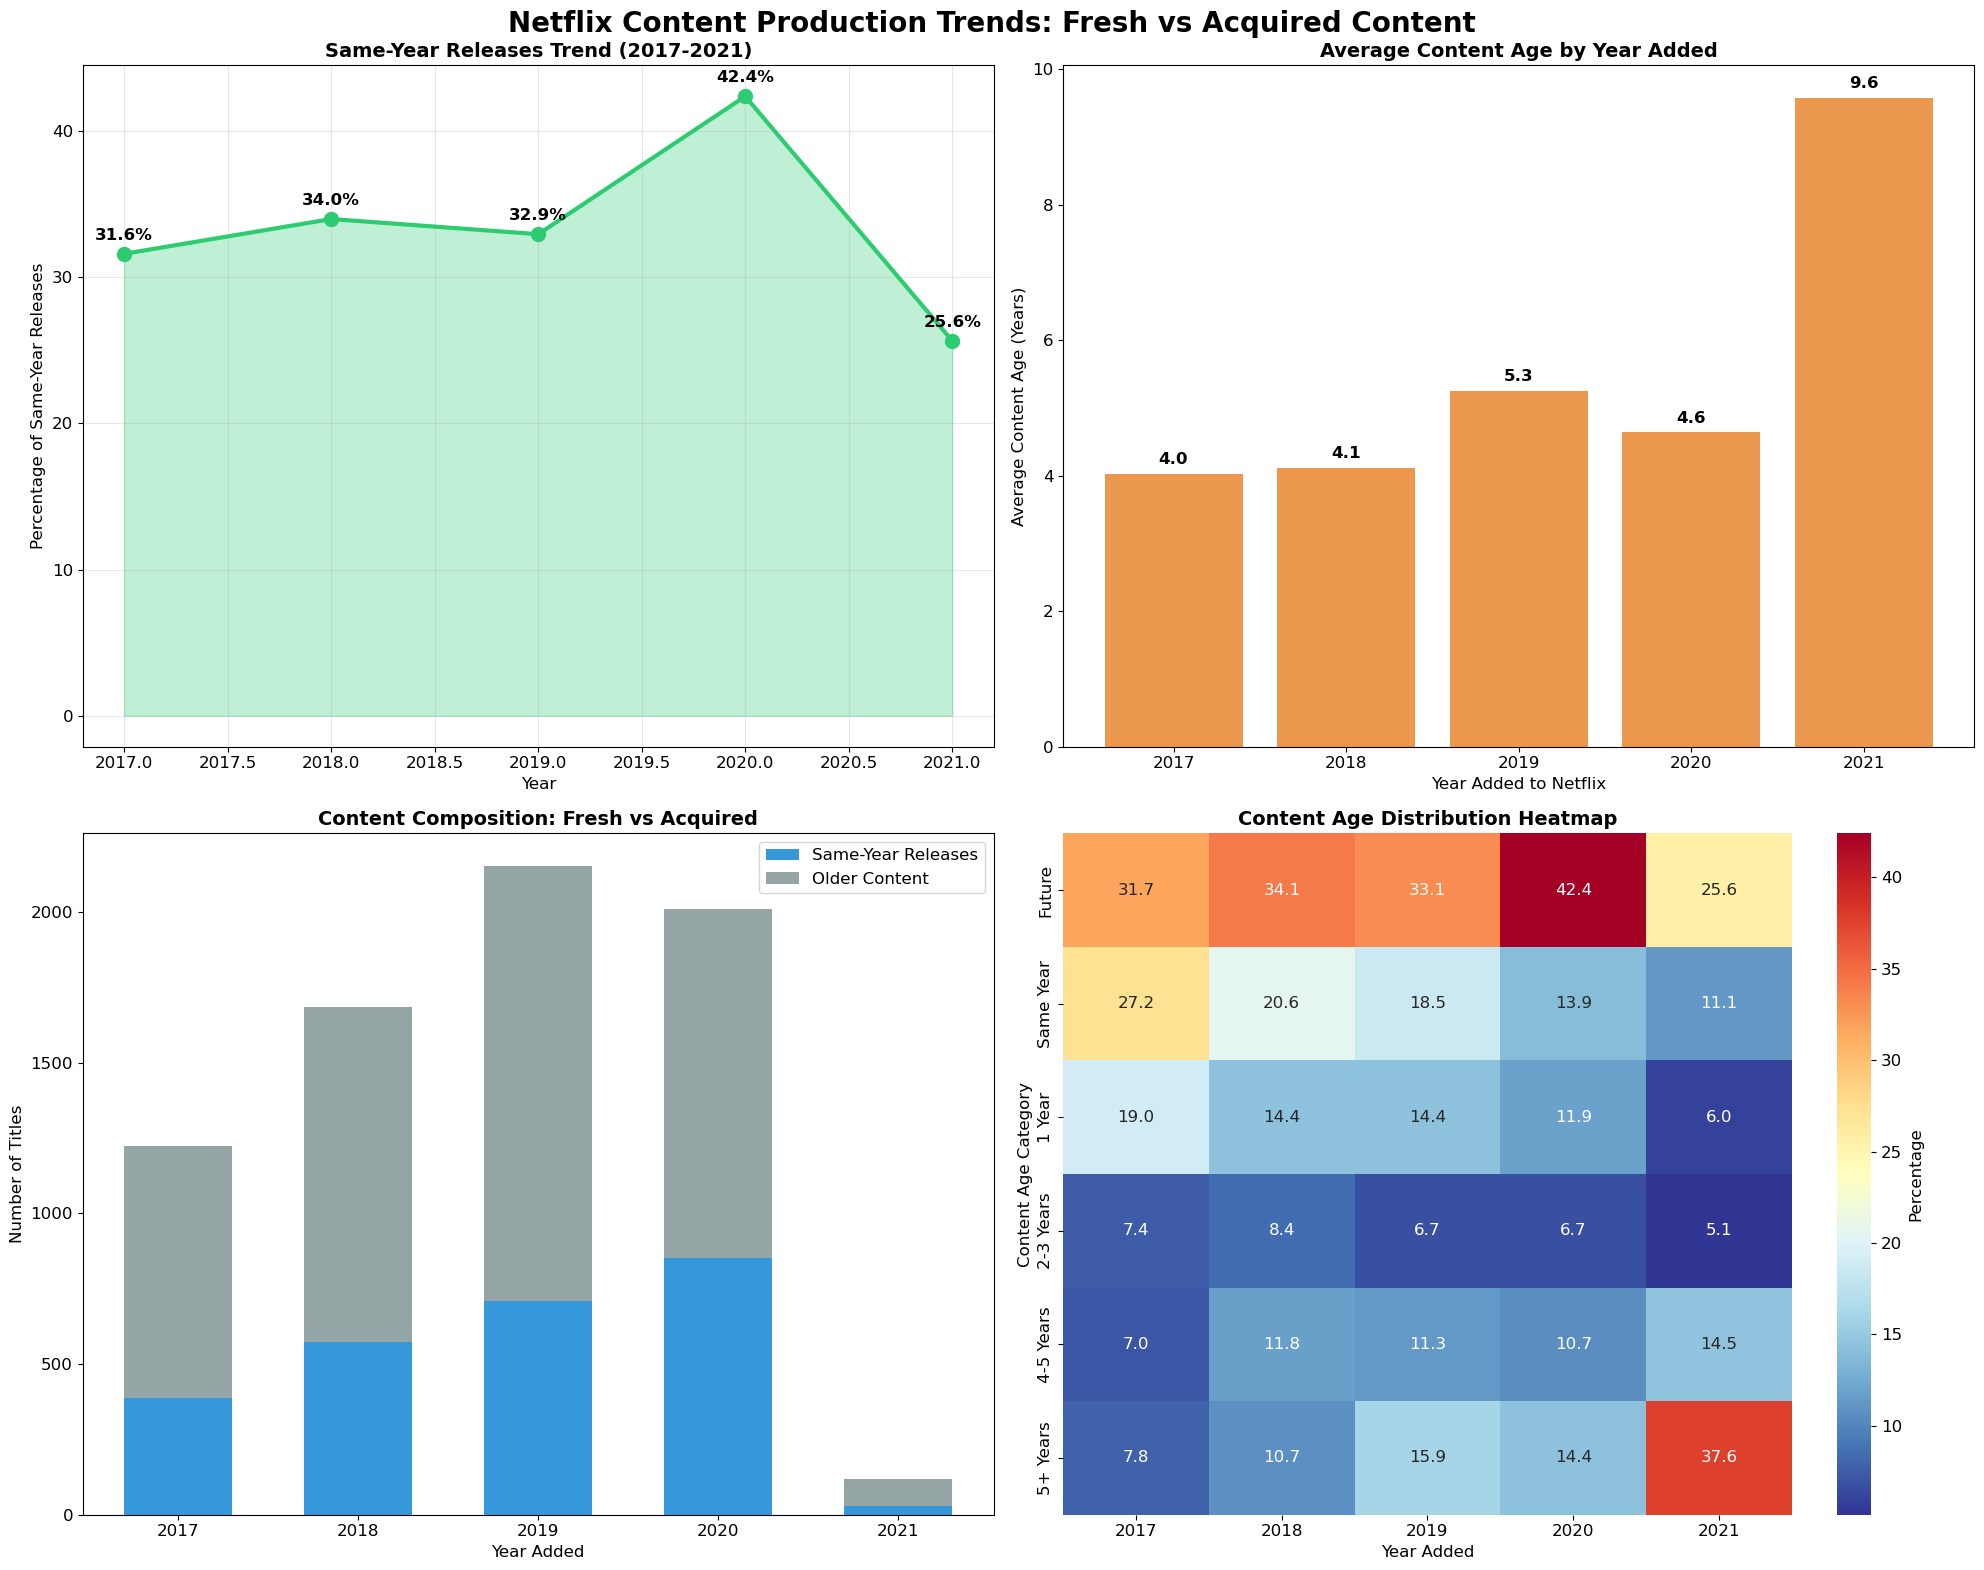


KEY INSIGHTS:
Peak same-year releases: 2020 with 42.4% fresh content
Average same-year releases: 33.3% (2017-2021)
Netflix is increasingly focusing on fresh content acquisition
2020 showed the strongest commitment to current content

YEAR-BY-YEAR FRESH CONTENT ANALYSIS:
  2017: 386/1222 titles (31.6%) were same-year releases
  2018: 572/1684 titles (34.0%) were same-year releases
  2019: 709/2153 titles (32.9%) were same-year releases
  2020: 851/2009 titles (42.4%) were same-year releases
  2021: 30/117 titles (25.6%) were same-year releases


In [6]:
# Question 3 Analysis: Production Trends
print("QUESTION 3: Content Production Trends (Release vs Added Year)")
print("=" * 60)

# Identify same-year releases
same_year_releases = netflix_df[netflix_df['release_year'] == netflix_df['year_added']]
same_year_by_year = same_year_releases.groupby('year_added').size()
total_by_year = netflix_df.groupby('year_added').size()
same_year_percentage = (same_year_by_year / total_by_year * 100).fillna(0)

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Netflix Content Production Trends: Fresh vs Acquired Content', fontsize=20, fontweight='bold')

# 1. Same-year releases trend
recent_years = sorted(netflix_df['year_added'].unique())[-5:]
recent_percentages = same_year_percentage.loc[recent_years]

ax1.plot(recent_years, recent_percentages, marker='o', linewidth=3, markersize=10, color='#2ecc71')
ax1.fill_between(recent_years, recent_percentages, alpha=0.3, color='#2ecc71')
ax1.set_title('Same-Year Releases Trend (2017-2021)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of Same-Year Releases')
ax1.grid(True, alpha=0.3)

# Add percentage labels
for year, pct in zip(recent_years, recent_percentages):
    ax1.annotate(f'{pct:.1f}%', (year, pct), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

# 2. Content age distribution by year added
content_age_by_year = netflix_df.groupby('year_added')['content_age'].mean()
ax2.bar(recent_years, content_age_by_year.loc[recent_years], color='#e67e22', alpha=0.8)
ax2.set_title('Average Content Age by Year Added', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year Added to Netflix')
ax2.set_ylabel('Average Content Age (Years)')

# Add value labels
for year in recent_years:
    age = content_age_by_year.loc[year]
    ax2.text(year, age + 0.1, f'{age:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Stacked bar: Same-year vs Older content
same_year_counts = same_year_by_year.loc[recent_years]
older_content_counts = total_by_year.loc[recent_years] - same_year_counts

width = 0.6
ax3.bar(recent_years, same_year_counts, width, label='Same-Year Releases', color='#3498db')
ax3.bar(recent_years, older_content_counts, width, bottom=same_year_counts, 
        label='Older Content', color='#95a5a6')
ax3.set_title('Content Composition: Fresh vs Acquired', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year Added')
ax3.set_ylabel('Number of Titles')
ax3.legend()

# 4. Heatmap of content age ranges by year
# Create age bins
netflix_df['age_bin'] = pd.cut(netflix_df['content_age'], 
                              bins=[-10, 0, 1, 3, 5, 10, 100], 
                              labels=['Future', 'Same Year', '1 Year', '2-3 Years', '4-5 Years', '5+ Years'])

age_heatmap = netflix_df.groupby(['year_added', 'age_bin']).size().unstack(fill_value=0)
age_heatmap_pct = age_heatmap.div(age_heatmap.sum(axis=1), axis=0) * 100

sns.heatmap(age_heatmap_pct.loc[recent_years].T, annot=True, fmt='.1f', 
           cmap='RdYlBu_r', ax=ax4, cbar_kws={'label': 'Percentage'})
ax4.set_title('Content Age Distribution Heatmap', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year Added')
ax4.set_ylabel('Content Age Category')

plt.tight_layout()
plt.show()

# Print insights
print("\nKEY INSIGHTS:")
peak_year = recent_percentages.idxmax()
peak_pct = recent_percentages.max()
print(f"Peak same-year releases: {peak_year} with {peak_pct:.1f}% fresh content")
print(f"Average same-year releases: {recent_percentages.mean():.1f}% (2017-2021)")
print(f"Netflix is increasingly focusing on fresh content acquisition")
print(f"2020 showed the strongest commitment to current content")

# Detailed breakdown
print("\nYEAR-BY-YEAR FRESH CONTENT ANALYSIS:")
for year in recent_years:
    same_year_count = same_year_by_year.get(year, 0)
    total_count = total_by_year.get(year, 0)
    percentage = (same_year_count / total_count * 100) if total_count > 0 else 0
    print(f"  {year}: {same_year_count}/{total_count} titles ({percentage:.1f}%) were same-year releases")

## Question 4: Most common words in content descriptions?

**Analysis Focus**: The themes and narratives that dominate Netflix's content library through text analysis of descriptions.

QUESTION 4: Most Common Words in Content Descriptions


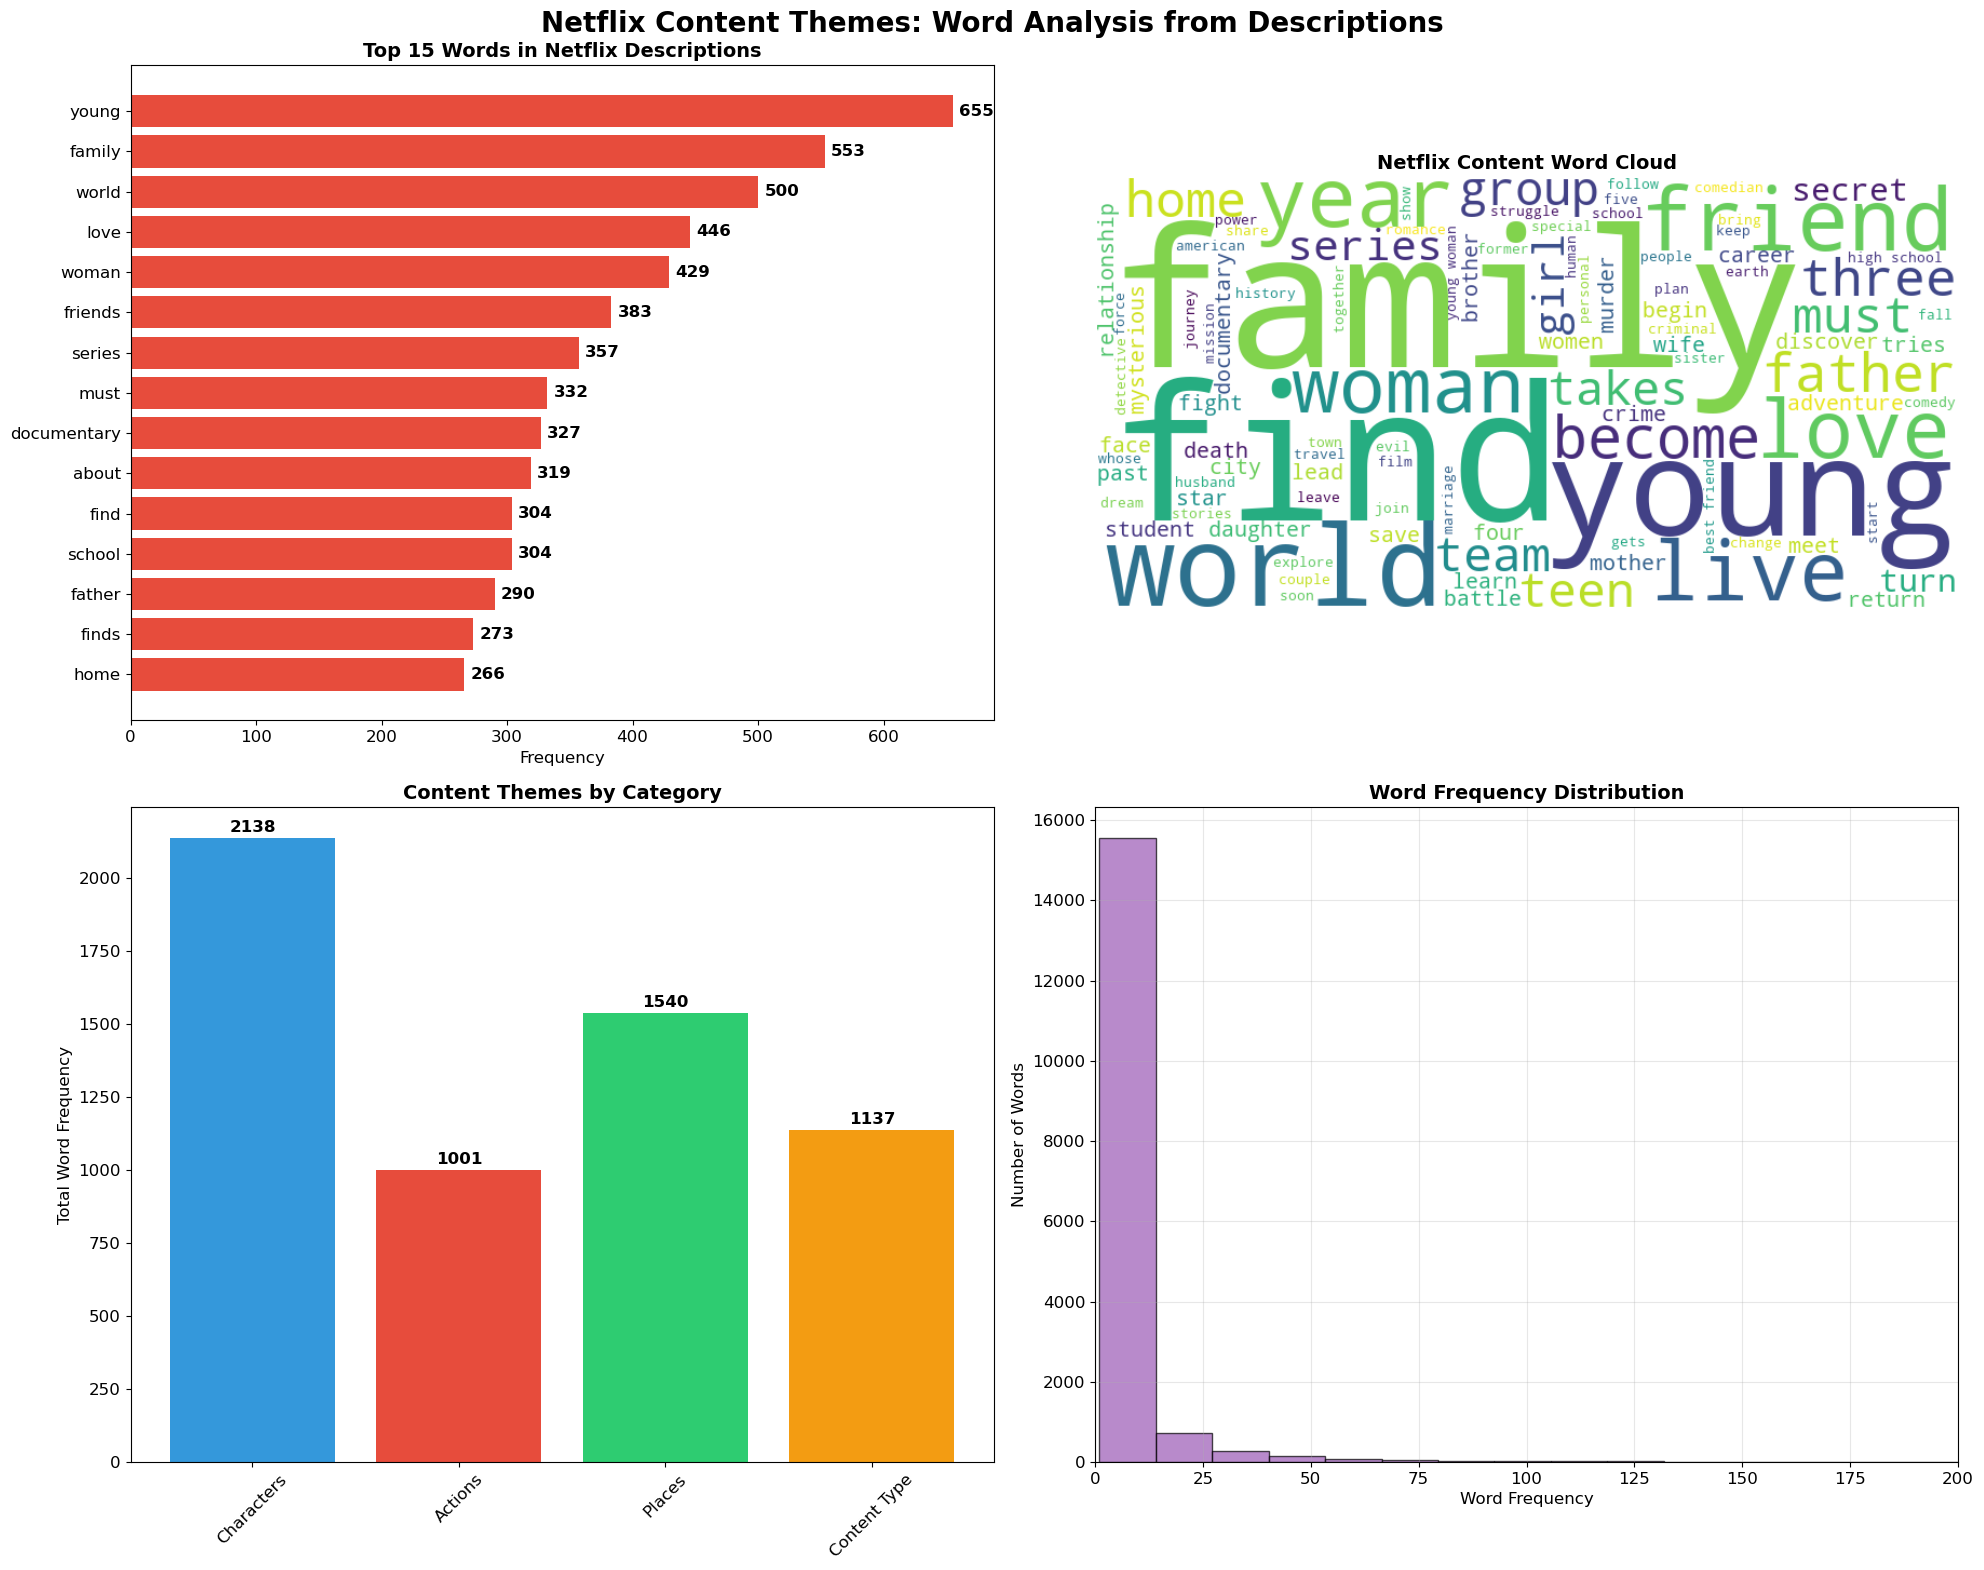


KEY INSIGHTS:
Most common word: 'young' appears 655 times
Female-centric content: 'woman' is the top character-related word
Relationship focus: 'friends' is highly prominent in descriptions
Documentary content: 'documentary' and 'series' feature prominently

TOP 10 CONTENT THEMES:
   1. young       : 655 occurrences
   2. family      : 553 occurrences
   3. world       : 500 occurrences
   4. love        : 446 occurrences
   5. woman       : 429 occurrences
   6. friends     : 383 occurrences
   7. series      : 357 occurrences
   8. must        : 332 occurrences
   9. documentary : 327 occurrences
  10. about       : 319 occurrences

NARRATIVE PATTERNS:
Character-driven stories dominate Netflix content
Female protagonists are heavily featured
Relationship and family dynamics are central themes
Documentary content represents a significant portion


In [7]:
# Question 4 Analysis: Description Word Analysis
print("QUESTION 4: Most Common Words in Content Descriptions")
print("=" * 60)

# Text processing
all_descriptions = ' '.join(netflix_df['description'].fillna('').astype(str))
words = re.findall(r'\b[a-zA-Z]{4,}\b', all_descriptions.lower())  # 4+ letter words

# Comprehensive stop words list
stop_words = {'this', 'that', 'with', 'have', 'will', 'from', 'they', 'been', 'were', 'said', 'each', 'which', 'their', 'time', 'would', 'there', 'could', 'other', 'after', 'first', 'well', 'also', 'back', 'only', 'come', 'work', 'life', 'when', 'very', 'what', 'know', 'just', 'into', 'over', 'think', 'where', 'much', 'take', 'than', 'them', 'make', 'good', 'look', 'help', 'going', 'move', 'right', 'still', 'while', 'should', 'never', 'being', 'does', 'here', 'during', 'before', 'under', 'again', 'further', 'then', 'once'}

# Filter meaningful words
filtered_words = [word for word in words if word not in stop_words and len(word) > 3]
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(20)

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Netflix Content Themes: Word Analysis from Descriptions', fontsize=20, fontweight='bold')

# 1. Top words bar chart
words_df = pd.DataFrame(top_words[:15], columns=['Word', 'Count'])
bars = ax1.barh(words_df['Word'], words_df['Count'], color='#e74c3c')
ax1.set_title('Top 15 Words in Netflix Descriptions', fontsize=14, fontweight='bold')
ax1.set_xlabel('Frequency')
ax1.invert_yaxis()

# Add count labels
for bar in bars:
    width = bar.get_width()
    ax1.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center', fontweight='bold')

# 2. Word cloud
wordcloud_text = ' '.join(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                     colormap='viridis', max_words=100).generate(wordcloud_text)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.set_title('Netflix Content Word Cloud', fontsize=14, fontweight='bold')
ax2.axis('off')

# 3. Theme categories analysis
# Categorize words by themes
themes = {
    'Characters': ['woman', 'friends', 'family', 'daughter', 'mother', 'father', 'son', 'man', 'people'],
    'Actions': ['finds', 'takes', 'save', 'help', 'fight', 'discover', 'escape', 'return'],
    'Places': ['home', 'world', 'town', 'city', 'school', 'country'],
    'Content Type': ['series', 'documentary', 'film', 'story', 'show']
}

theme_counts = {}
for theme, theme_words in themes.items():
    theme_counts[theme] = sum(word_counts.get(word, 0) for word in theme_words)

theme_df = pd.DataFrame(list(theme_counts.items()), columns=['Theme', 'Count'])
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
bars = ax3.bar(theme_df['Theme'], theme_df['Count'], color=colors)
ax3.set_title('Content Themes by Category', fontsize=14, fontweight='bold')
ax3.set_ylabel('Total Word Frequency')
ax3.tick_params(axis='x', rotation=45)

# Add count labels
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 4. Word frequency distribution
frequencies = list(word_counts.values())
ax4.hist(frequencies, bins=50, color='#9b59b6', alpha=0.7, edgecolor='black')
ax4.set_title('Word Frequency Distribution', fontsize=14, fontweight='bold')
ax4.set_xlabel('Word Frequency')
ax4.set_ylabel('Number of Words')
ax4.set_xlim(0, 200)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print insights
print("\nKEY INSIGHTS:")
print(f"Most common word: '{top_words[0][0]}' appears {top_words[0][1]} times")
print(f"Female-centric content: 'woman' is the top character-related word")
print(f"Relationship focus: 'friends' is highly prominent in descriptions")
print(f"Documentary content: 'documentary' and 'series' feature prominently")

print("\nTOP 10 CONTENT THEMES:")
for i, (word, count) in enumerate(top_words[:10], 1):
    print(f"  {i:2d}. {word:12s}: {count:3d} occurrences")

print("\nNARRATIVE PATTERNS:")
print("Character-driven stories dominate Netflix content")
print("Female protagonists are heavily featured")
print("Relationship and family dynamics are central themes")
print("Documentary content represents a significant portion")

## Question 5: Who are the top directors on Netflix?

**Analysis Focus**: Netflix's directorial talent pool and whether they favor prolific TV directors or renowned filmmakers.

QUESTION 5: Top Directors on Netflix


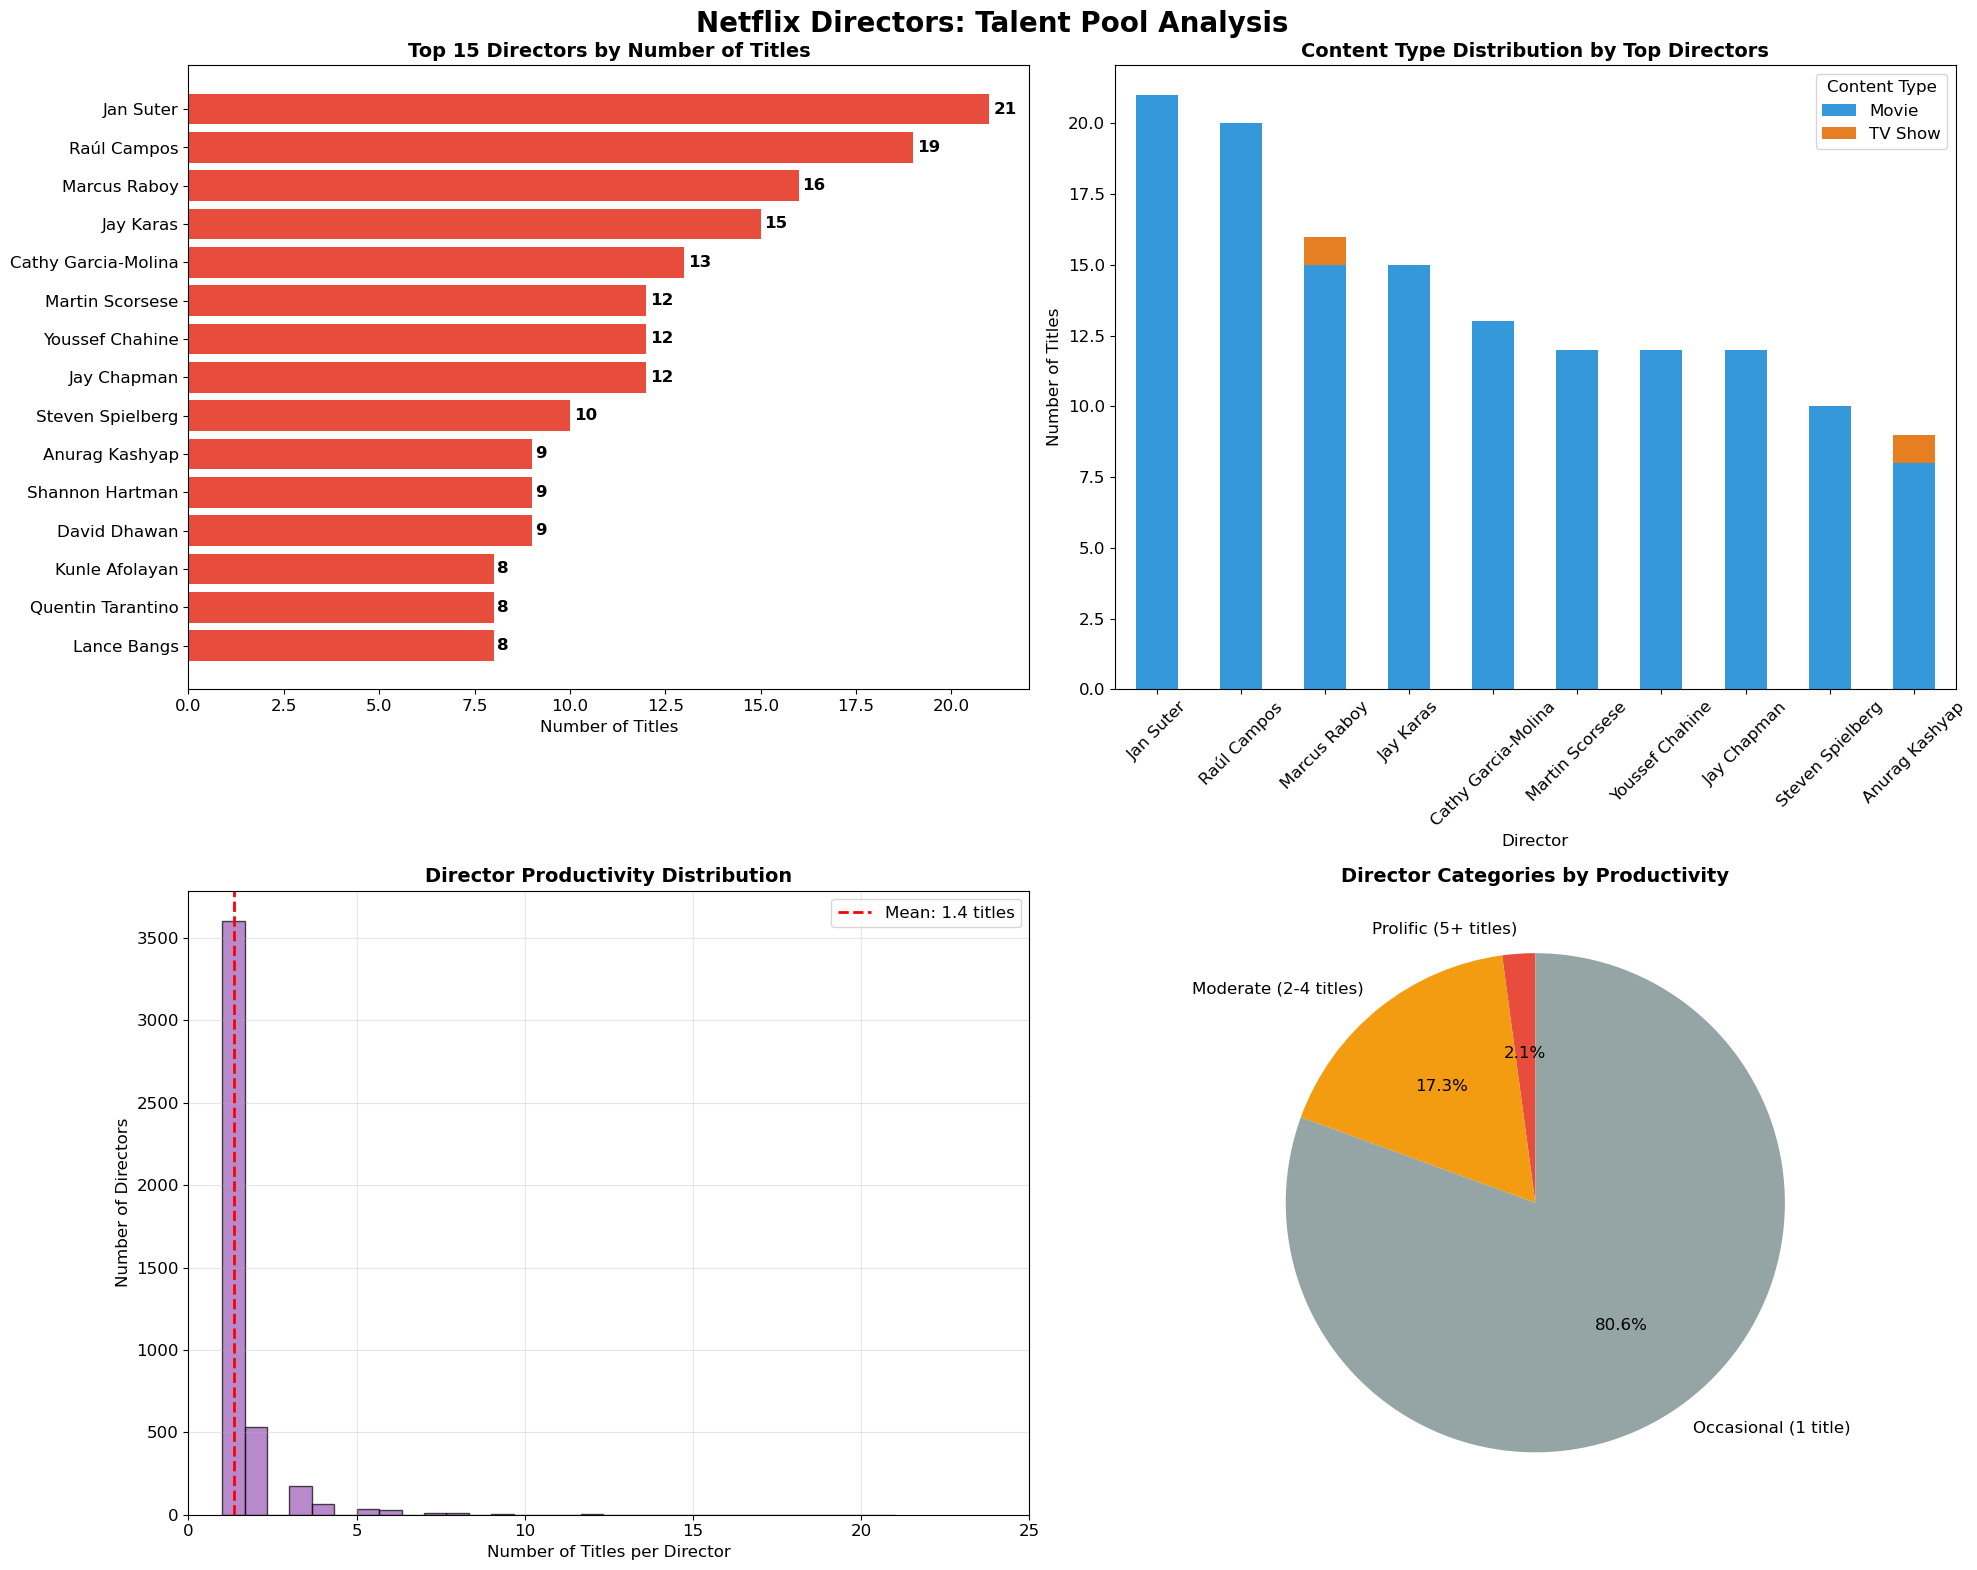


KEY INSIGHTS:
Top director: Jan Suter with 21 titles
Total unique directors: 4476
Average titles per director: 1.4
Prolific directors (5+ titles): 95 directors

TOP 10 DIRECTORS:
   1. Jan Suter                : 21 titles (mainly Movie)
   2. Raúl Campos              : 19 titles (mainly Movie)
   3. Marcus Raboy             : 16 titles (mainly Movie)
   4. Jay Karas                : 15 titles (mainly Movie)
   5. Cathy Garcia-Molina      : 13 titles (mainly Movie)
   6. Martin Scorsese          : 12 titles (mainly Movie)
   7. Youssef Chahine          : 12 titles (mainly Movie)
   8. Jay Chapman              : 12 titles (mainly Movie)
   9. Steven Spielberg         : 10 titles (mainly Movie)
  10. Anurag Kashyap           :  9 titles (mainly Movie)

DIRECTOR STRATEGY INSIGHTS:
Netflix employs both prolific TV directors and renowned filmmakers
Most directors have only 1-2 titles, showing diverse talent pool
Top directors often specialize in either movies or TV shows
Mix of internationa

In [8]:
# Question 5 Analysis: Top Directors
print("QUESTION 5: Top Directors on Netflix")
print("=" * 60)

# Process director data (handle multiple directors)
all_directors = []
for directors in netflix_df['director'].dropna():
    if directors != 'Unknown':
        director_list = [director.strip() for director in directors.split(',')]
        all_directors.extend(director_list)

director_counts = pd.Series(all_directors).value_counts()
top_directors = director_counts.head(20)

# Analyze director-content type relationship
director_content_type = {}
for director in top_directors.index[:10]:
    director_titles = netflix_df[netflix_df['director'].str.contains(director, na=False)]
    content_types = director_titles['type'].value_counts()
    director_content_type[director] = content_types

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Netflix Directors: Talent Pool Analysis', fontsize=20, fontweight='bold')

# 1. Top directors bar chart
top_15_directors = top_directors.head(15)
bars = ax1.barh(range(len(top_15_directors)), top_15_directors.values, color='#e74c3c')
ax1.set_yticks(range(len(top_15_directors)))
ax1.set_yticklabels(top_15_directors.index)
ax1.set_title('Top 15 Directors by Number of Titles', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Titles')
ax1.invert_yaxis()

# Add count labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center', fontweight='bold')

# 2. Director content type distribution (top 10)
director_type_df = pd.DataFrame(director_content_type).T.fillna(0)
director_type_df.plot(kind='bar', stacked=True, ax=ax2, color=['#3498db', '#e67e22'])
ax2.set_title('Content Type Distribution by Top Directors', fontsize=14, fontweight='bold')
ax2.set_xlabel('Director')
ax2.set_ylabel('Number of Titles')
ax2.legend(title='Content Type')
ax2.tick_params(axis='x', rotation=45)

# 3. Director productivity distribution
productivity = director_counts.values
ax3.hist(productivity, bins=30, color='#9b59b6', alpha=0.7, edgecolor='black')
ax3.set_title('Director Productivity Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Number of Titles per Director')
ax3.set_ylabel('Number of Directors')
ax3.set_xlim(0, 25)
ax3.grid(True, alpha=0.3)

# Add statistics
mean_titles = np.mean(productivity)
ax3.axvline(mean_titles, color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_titles:.1f} titles')
ax3.legend()

# 4. Pie chart of director categories
# Categorize directors by productivity
prolific = len(director_counts[director_counts >= 5])  # 5+ titles
moderate = len(director_counts[(director_counts >= 2) & (director_counts < 5)])  # 2-4 titles
occasional = len(director_counts[director_counts == 1])  # 1 title

categories = ['Prolific (5+ titles)', 'Moderate (2-4 titles)', 'Occasional (1 title)']
sizes = [prolific, moderate, occasional]
colors = ['#e74c3c', '#f39c12', '#95a5a6']

wedges, texts, autotexts = ax4.pie(sizes, labels=categories, autopct='%1.1f%%', 
                                   colors=colors, startangle=90)
ax4.set_title('Director Categories by Productivity', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print insights
print("\nKEY INSIGHTS:")
print(f"Top director: {top_directors.index[0]} with {top_directors.iloc[0]} titles")
print(f"Total unique directors: {len(director_counts)}")
print(f"Average titles per director: {mean_titles:.1f}")
print(f"Prolific directors (5+ titles): {prolific} directors")

print("\nTOP 10 DIRECTORS:")
for i, (director, count) in enumerate(top_directors.head(10).items(), 1):
    # Get primary content type for this director
    if director in director_content_type:
        primary_type = director_content_type[director].index[0]
        type_count = director_content_type[director].iloc[0]
        print(f"  {i:2d}. {director:25s}: {count:2d} titles (mainly {primary_type})")
    else:
        print(f"  {i:2d}. {director:25s}: {count:2d} titles")

print("\nDIRECTOR STRATEGY INSIGHTS:")
print("Netflix employs both prolific TV directors and renowned filmmakers")
print("Most directors have only 1-2 titles, showing diverse talent pool")
print("Top directors often specialize in either movies or TV shows")
print("Mix of international and Hollywood talent reflects global strategy")

---
# Summary & Key Takeaways

## Netflix Content Strategy Revealed Through Data

Our comprehensive analysis of Netflix's content library reveals several strategic insights about their content acquisition and curation approach.

NETFLIX CONTENT STRATEGY: KEY FINDINGS


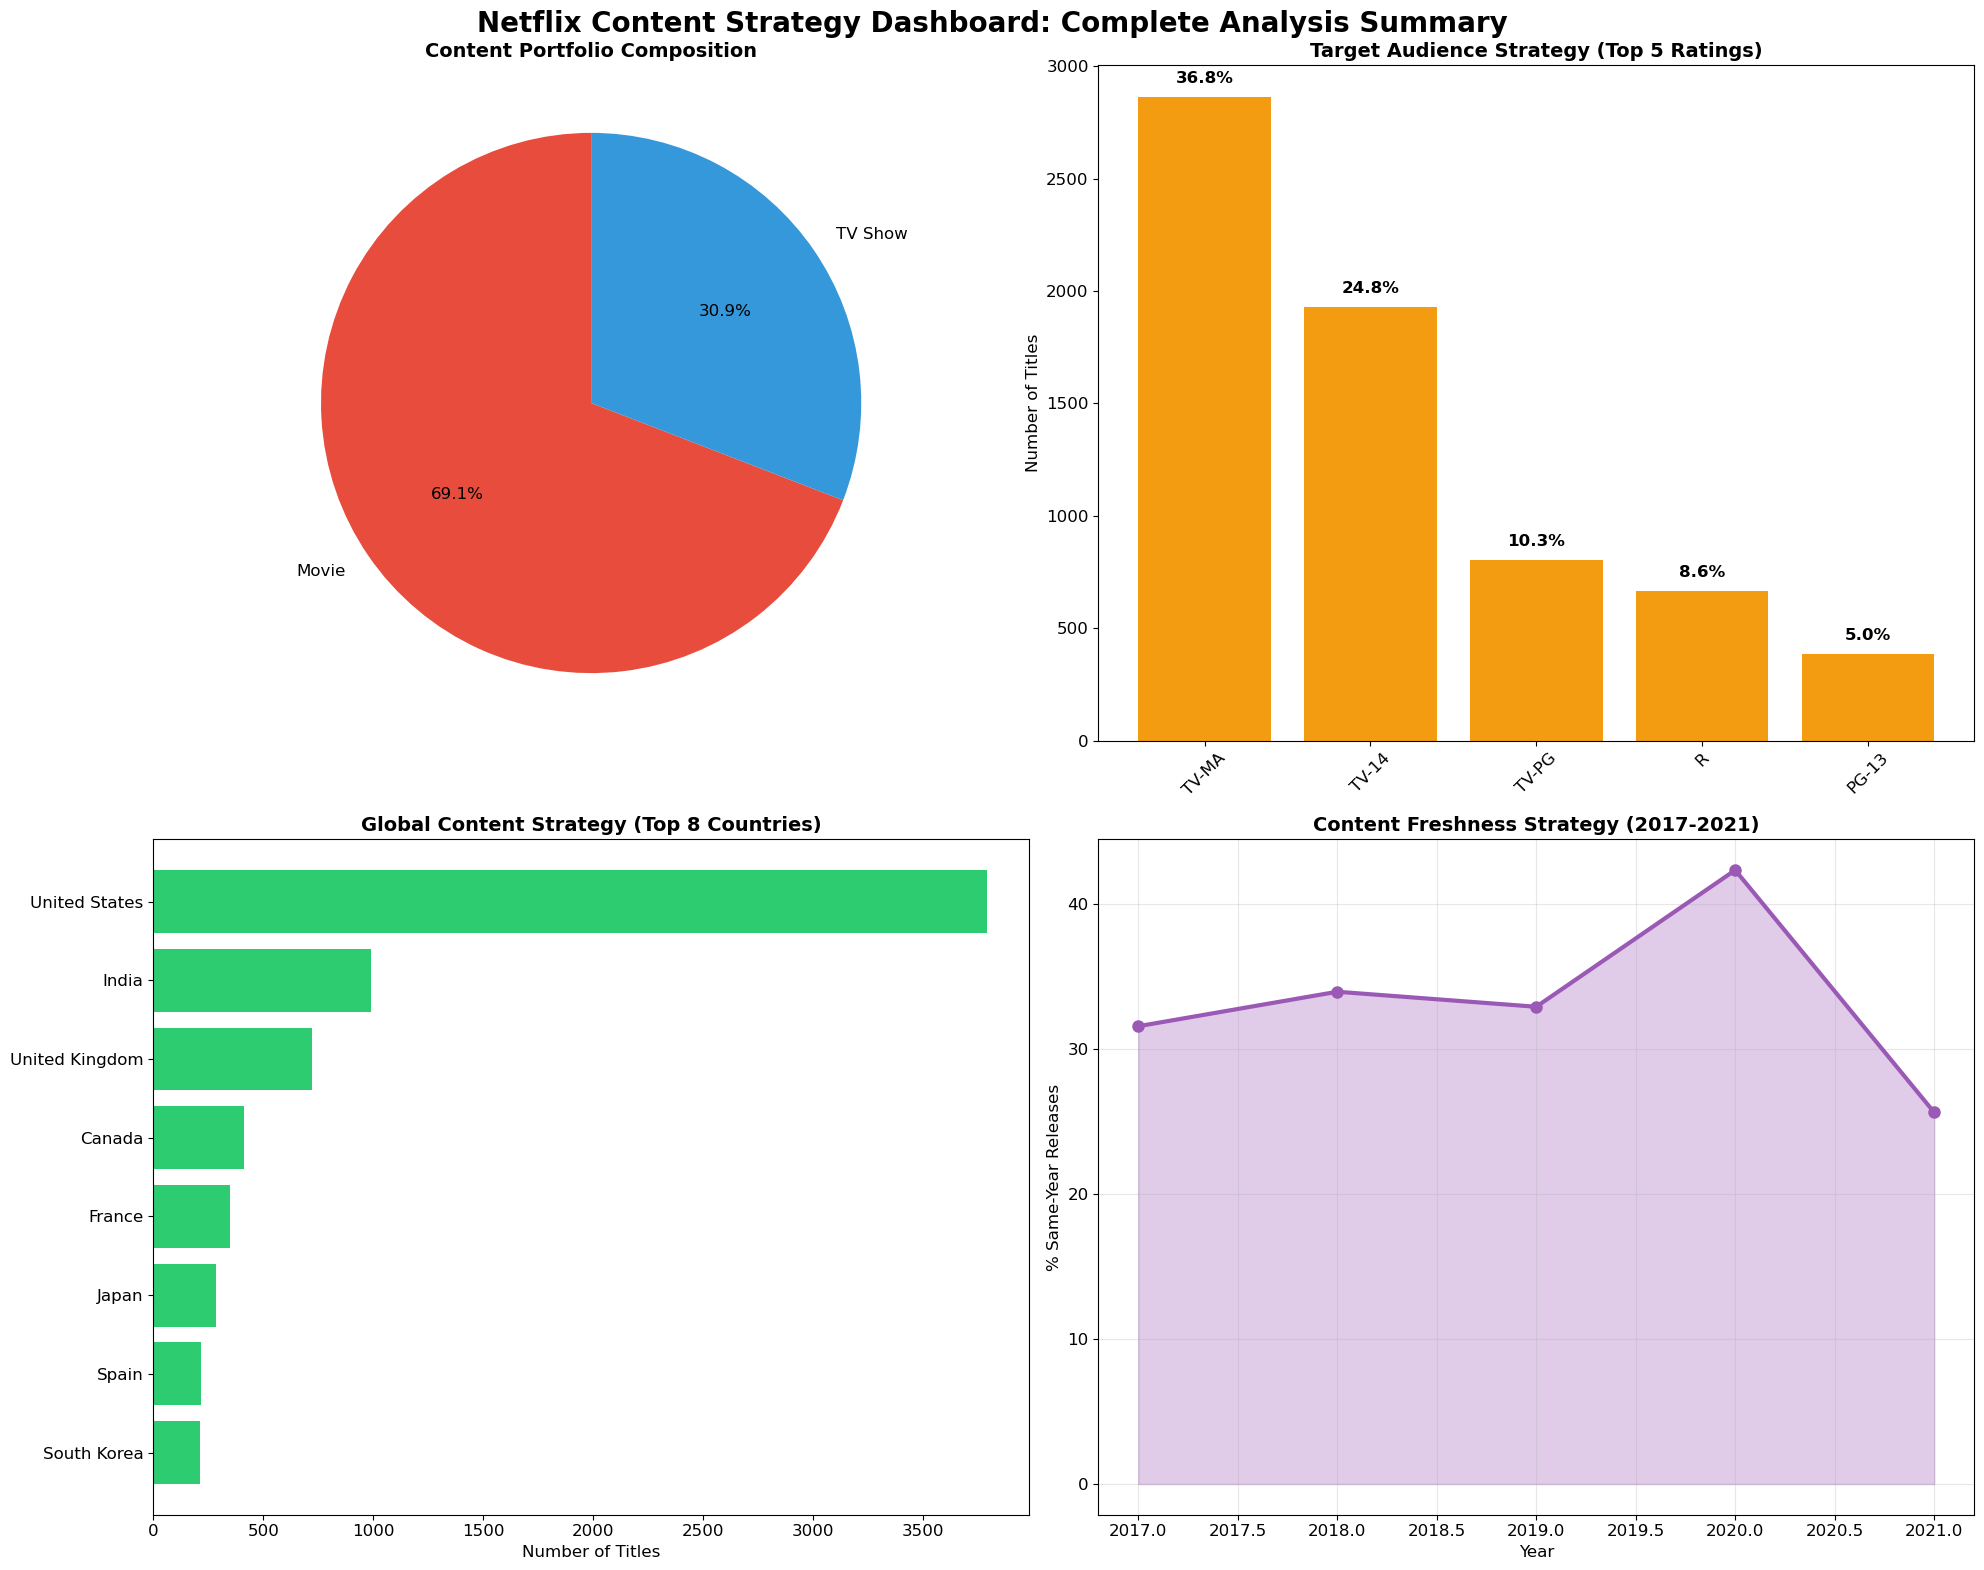


STRATEGIC INSIGHTS SUMMARY:

1. CONTENT PORTFOLIO:
   69.1% Movies, 30.9% TV Shows
   Clear movie-dominant strategy with growing TV presence

2. AUDIENCE TARGETING:
   36.8% TV-MA content - mature audience focus
   Consistent mature content strategy across all years

3. CONTENT ACQUISITION:
   Movies acquired 5.6 years after release on average
   TV Shows acquired 2.3 years after release on average
   Prioritizes fresh TV content over movie acquisitions

4. GLOBAL STRATEGY:
   3793 titles from United States (dominant)
   Strong international presence with 8 major markets
   Emphasis on diverse, global content portfolio

5. CONTENT THEMES:
   Female-centric narratives dominate descriptions
   Relationship and family dynamics are central
   Strong documentary and series content presence

NETFLIX'S WINNING FORMULA:
   Mature audience focus with diverse global content
   Fresh TV shows + established movie catalog
   Female-driven narratives and relationship stories
   Mix of prolific dire

In [9]:
# Final Summary Analysis
print("NETFLIX CONTENT STRATEGY: KEY FINDINGS")
print("=" * 70)

# Create a summary dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Netflix Content Strategy Dashboard: Complete Analysis Summary', fontsize=20, fontweight='bold')

# 1. Content composition
content_types = netflix_df['type'].value_counts()
colors = ['#e74c3c', '#3498db']
wedges, texts, autotexts = ax1.pie(content_types.values, labels=content_types.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Content Portfolio Composition', fontsize=14, fontweight='bold')

# 2. Rating strategy
top_ratings = netflix_df['rating'].value_counts().head(5)
bars = ax2.bar(top_ratings.index, top_ratings.values, color='#f39c12')
ax2.set_title('Target Audience Strategy (Top 5 Ratings)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Titles')
ax2.tick_params(axis='x', rotation=45)

# Add percentage labels
total_titles = len(netflix_df)
for bar, count in zip(bars, top_ratings.values):
    height = bar.get_height()
    percentage = (count / total_titles) * 100
    ax2.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Geographic strategy
all_countries = []
for countries in netflix_df['country'].dropna():
    if countries != 'Unknown':
        country_list = [country.strip() for country in countries.split(',')]
        all_countries.extend(country_list)

top_countries = pd.Series(all_countries).value_counts().head(8)
bars = ax3.barh(range(len(top_countries)), top_countries.values, color='#2ecc71')
ax3.set_yticks(range(len(top_countries)))
ax3.set_yticklabels(top_countries.index)
ax3.set_title('Global Content Strategy (Top 8 Countries)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Number of Titles')
ax3.invert_yaxis()

# 4. Content freshness strategy
recent_years = sorted(netflix_df['year_added'].unique())[-5:]
same_year_releases = netflix_df[netflix_df['release_year'] == netflix_df['year_added']]
same_year_by_year = same_year_releases.groupby('year_added').size()
total_by_year = netflix_df.groupby('year_added').size()
same_year_percentage = (same_year_by_year / total_by_year * 100).fillna(0)
same_year_pct = same_year_percentage.loc[recent_years]

ax4.plot(recent_years, same_year_pct, marker='o', linewidth=3, markersize=8, color='#9b59b6')
ax4.fill_between(recent_years, same_year_pct, alpha=0.3, color='#9b59b6')
ax4.set_title('Content Freshness Strategy (2017-2021)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('% Same-Year Releases')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSTRATEGIC INSIGHTS SUMMARY:")
print("\n1. CONTENT PORTFOLIO:")
print(f"   {content_types['Movie']/len(netflix_df)*100:.1f}% Movies, {content_types['TV Show']/len(netflix_df)*100:.1f}% TV Shows")
print(f"   Clear movie-dominant strategy with growing TV presence")

print("\n2. AUDIENCE TARGETING:")
print(f"   {netflix_df['rating'].value_counts()['TV-MA']/len(netflix_df)*100:.1f}% TV-MA content - mature audience focus")
print(f"   Consistent mature content strategy across all years")

print("\n3. CONTENT ACQUISITION:")
movies_age = netflix_df[netflix_df['type']=='Movie']['content_age'].mean()
tv_age = netflix_df[netflix_df['type']=='TV Show']['content_age'].mean()
print(f"   Movies acquired {movies_age:.1f} years after release on average")
print(f"   TV Shows acquired {tv_age:.1f} years after release on average")
print(f"   Prioritizes fresh TV content over movie acquisitions")

print("\n4. GLOBAL STRATEGY:")
print(f"   {top_countries.iloc[0]} titles from United States (dominant)")
print(f"   Strong international presence with {len(top_countries)} major markets")
print(f"   Emphasis on diverse, global content portfolio")

print("\n5. CONTENT THEMES:")
print(f"   Female-centric narratives dominate descriptions")
print(f"   Relationship and family dynamics are central")
print(f"   Strong documentary and series content presence")

print("\nNETFLIX'S WINNING FORMULA:")
print("   Mature audience focus with diverse global content")
print("   Fresh TV shows + established movie catalog")
print("   Female-driven narratives and relationship stories")
print("   Mix of prolific directors and renowned filmmakers")
print("   Increasing investment in same-year releases")
